In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("sample-1-cell-tracks.csv")
data

,x,y,z,t,layer,id
0,-147.814283,-165.467769,47.131947,1,1,1
1,-150.808280,-152.973941,50.887035,2,1,1
2,-152.294793,-151.385903,58.260303,3,1,1
3,-149.489305,-151.300336,65.102116,4,1,1
4,-149.111093,-150.414899,61.139568,5,1,1
...,...,...,...,...,...,...
1727519,-161.742274,269.434709,-12.104361,420,3,12196
1727520,-144.169975,55.590522,128.257221,417,3,12197
1727521,-144.487019,56.224228,126.868747,418,3,12197
1727522,-142.992843,57.856776,127.278687,419,3,12197


In [3]:
x = data.x
y = data.y
z = data.z

In [4]:
def tospherical(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)               
    theta = np.arctan2(z,np.sqrt(x**2 + y**2)) + np.pi/2
    phi = np.arctan2(y,x) + np.pi                      
    return r, theta, phi

In [5]:
test = np.array(tospherical(x,y,z))
test1 = np.transpose(np.array(tospherical(x,y,z)))
pd.DataFrame(test1).to_csv('sphericalcoordinates.csv', header  = ['r','theta','phi']) 

In [122]:
spherical = pd.read_csv("sphericalcoordinates.csv")
spherical

,Unnamed: 0,r,theta,phi
0,0,226.826068,1.780110,0.841689
1,1,220.757002,1.803400,0.792527
2,2,222.498671,1.835730,0.782405
3,3,222.434551,1.867825,0.791419
4,4,220.446834,1.851825,0.789751
...,...,...,...,...
1727519,1727519,314.487108,1.532298,5.253031
1727520,1727520,200.811361,2.263597,5.915163
1727521,1727521,200.333077,2.256592,5.912085
1727522,1727522,199.985559,2.260670,5.898708


In [123]:
data['x'] = spherical['r']
data['y'] = spherical['theta']
data['z'] = spherical['phi']
data

,x,y,z,t,layer,id
0,226.826068,1.780110,0.841689,1,1,1
1,220.757002,1.803400,0.792527,2,1,1
2,222.498671,1.835730,0.782405,3,1,1
3,222.434551,1.867825,0.791419,4,1,1
4,220.446834,1.851825,0.789751,5,1,1
...,...,...,...,...,...,...
1727519,314.487108,1.532298,5.253031,420,3,12196
1727520,200.811361,2.263597,5.915163,417,3,12197
1727521,200.333077,2.256592,5.912085,418,3,12197
1727522,199.985559,2.260670,5.898708,419,3,12197


In [12]:
cell_layer1 = []
for i in range(1,11):
    dci, cil1 = [x for _, x in data.groupby((data['id'] == i)&(data['layer'] == 2))]
    cell_layer1.append(cil1)
print(cell_layer1)

[               x           y          z   t  layer  id
724615 -2.782216 -237.958241  65.562710   2      2   1
724616 -1.600085 -240.321777  64.521080   3      2   1
724617 -0.652943 -240.812934  62.487791   4      2   1
724618  1.093781 -241.348015  60.738553   5      2   1
724619  0.737015 -232.990699  59.194768   6      2   1
724620  1.566002 -233.564811  57.053294   7      2   1
724621  2.668537 -232.084912  56.738756   8      2   1
724622  4.486043 -233.620475  56.501661   9      2   1
724623  4.231285 -233.579962  55.418943  10      2   1
724624  5.356119 -234.700199  56.321186  11      2   1
724625  8.749229 -233.051396  53.192940  12      2   1
724626  9.723098 -233.202702  54.057519  13      2   1
724627  7.090614 -236.392213  64.117378  14      2   1,                 x           y          z   t  layer  id
724628  19.732967 -245.925303  45.395622   2      2   2
724629  26.969137 -234.706517  56.680056   3      2   2
724630  28.260463 -232.723412  55.294139   4      2   2
7246

In [ ]:
cell_layer2 = []
for i in range(1,12198):
    dci, cil2 = [x for _, x in data.groupby((data['id'] == i)&(data['layer'] == 2))]
    cell_layer2.append(cil2)

In [195]:
cell_layer3 = []
for i in range(1,10):
    dci, cil3 = [x for _, x in data.groupby((data['id'] == i)&(data['layer'] == 3))]
    cell_layer3.append(cil3)

In [191]:
#from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 #denoise_wavelet, estimate_sigma)

#celltrack1 = [cell_layer1[0].x,cell_layer1[0].y,cell_layer1[0].z]
#denoise_tv_chambolle(celltrack1, weight=0.1)

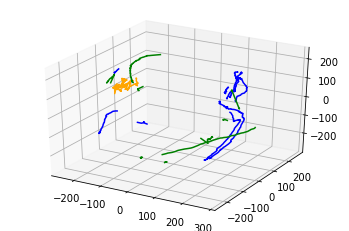

In [200]:
ax = plt.axes(projection='3d')
#layer1
ax.plot3D(cell_layer1[0].y, cell_layer1[0].z, cell_layer1[0].x,'blue')
ax.plot3D(cell_layer1[1].y, cell_layer1[1].z, cell_layer1[1].x,'blue')
ax.plot3D(cell_layer1[2].y, cell_layer1[2].z, cell_layer1[2].x,'blue')
ax.plot3D(cell_layer1[3].y, cell_layer1[3].z, cell_layer1[3].x,'blue')
ax.plot3D(cell_layer1[4].y, cell_layer1[4].z, cell_layer1[4].x,'blue')
ax.plot3D(cell_layer1[5].y, cell_layer1[5].z, cell_layer1[5].x,'blue')
ax.plot3D(cell_layer1[6].y, cell_layer1[6].z, cell_layer1[6].x,'blue')
ax.plot3D(cell_layer1[7].y, cell_layer1[7].z, cell_layer1[7].x,'blue')
ax.plot3D(cell_layer1[7].y, cell_layer1[7].z, cell_layer1[7].x,'blue')
ax.plot3D(cell_layer1[8].y, cell_layer1[8].z, cell_layer1[8].x,'blue')
#layer2
ax.plot3D(cell_layer2[0].y, cell_layer2[0].z, cell_layer2[0].x,'orange')
ax.plot3D(cell_layer2[1].y, cell_layer2[1].z, cell_layer2[1].x,'orange')
ax.plot3D(cell_layer2[2].y, cell_layer2[2].z, cell_layer2[2].x,'orange')
ax.plot3D(cell_layer2[3].y, cell_layer2[3].z, cell_layer2[3].x,'orange')
ax.plot3D(cell_layer2[4].y, cell_layer2[4].z, cell_layer2[4].x,'orange')
ax.plot3D(cell_layer2[5].y, cell_layer2[5].z, cell_layer2[5].x,'orange')
ax.plot3D(cell_layer2[6].y, cell_layer2[6].z, cell_layer2[6].x,'orange')
ax.plot3D(cell_layer2[7].y, cell_layer2[7].z, cell_layer2[7].x,'orange')
ax.plot3D(cell_layer2[7].y, cell_layer2[7].z, cell_layer2[7].x,'orange')
ax.plot3D(cell_layer2[8].y, cell_layer2[8].z, cell_layer2[8].x,'orange')
#layer3
ax.plot3D(cell_layer3[0].y, cell_layer3[0].z, cell_layer3[0].x,'green')
ax.plot3D(cell_layer3[1].y, cell_layer3[1].z, cell_layer3[1].x,'green')
ax.plot3D(cell_layer3[2].y, cell_layer3[2].z, cell_layer3[2].x,'green')
ax.plot3D(cell_layer3[3].y, cell_layer3[3].z, cell_layer3[3].x,'green')
ax.plot3D(cell_layer3[4].y, cell_layer3[4].z, cell_layer3[4].x,'green')
ax.plot3D(cell_layer3[5].y, cell_layer3[5].z, cell_layer3[5].x,'green')
ax.plot3D(cell_layer3[6].y, cell_layer3[6].z, cell_layer3[6].x,'green')
ax.plot3D(cell_layer3[7].y, cell_layer3[7].z, cell_layer3[7].x,'green')
ax.plot3D(cell_layer3[7].y, cell_layer3[7].z, cell_layer3[7].x,'green')
ax.plot3D(cell_layer3[8].y, cell_layer3[8].z, cell_layer3[8].x,'green')

In [203]:
#	fit a sphere to X,Y, and Z data points
#	returns the radius and center points of
#	the best fit sphere
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = np.sqrt(t)

    return radius, C[0], C[1], C[2]

NameError: name 'correctX' is not defined